In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import matplotlib.cm as cm
import numpy as np

In [3]:
market_cap = pd.read_csv('market_cap.csv',index_col=0)
ceo = pd.read_csv('ceo.csv',index_col=0)

In [4]:
merged = pd.merge(market_cap,ceo)
merged

,Ticker,Market Cap,Company,CEO,Year,CEO PaySort ascending
0,AVGO,9.348002e+11,Broadcom Inc.,Hock Tan,2023,161826161
1,PANW,1.260837e+11,Palo Alto Networks Inc.,Nikesh Arora,2023,151425203
2,BX,1.968038e+11,Blackstone Inc.,Stephen Schwarzman,2023,119784375
3,CHTR,5.160804e+10,"Charter Communications, Inc.",Christopher Winfrey,2023,89077078
4,FICO,4.606108e+10,Fair Isaac Corp.,William Lansing,2023,66349962
...,...,...,...,...,...,...
482,ABNB,8.628548e+10,"Airbnb, Inc.",Brian Chesky,2023,295125
483,TTWO,3.741362e+10,Take Two Interactive Software Inc.,Strauss Zelnick,2023,115015
484,AXON,4.029685e+10,Axon Enterprise,Patrick W. Smith,2023,40058
485,SMCI,2.460572e+10,"Super Micro Computer, Inc.",Charles Liang,2023,1


In [5]:
merged.sort_values(by='Market Cap',ascending=False,inplace=True)
chunks = [merged.iloc[i:i+60] for i in range(0, len(merged), 60)]
for i, chunk in enumerate(chunks):
    globals()[f"df_chunk_{i}"] = chunk


In [6]:
for chunk in chunks:
    chunk.sort_values(by='CEO PaySort ascending',ascending=False,inplace=True)
    chunk.reset_index(drop=True, inplace=True)
    chunk['Rank'] = chunk.index.to_series().apply(lambda x: 'high' if x < len(chunk)*1/3 else ('mid' if x < len(chunk)*2/3 else 'low'))

C:\Users\Mohaa\AppData\Local\Temp\ipykernel_11356\739979851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.sort_values(by='CEO PaySort ascending',ascending=False,inplace=True)
C:\Users\Mohaa\AppData\Local\Temp\ipykernel_11356\739979851.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Rank'] = chunk.index.to_series().apply(lambda x: 'high' if x < len(chunk)*1/3 else ('mid' if x < len(chunk)*2/3 else 'low'))
C:\Users\Mohaa\AppData\Local\Temp\ipykernel_11356\739979851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [7]:
all = pd.concat(chunks,ignore_index=True)
all

,Ticker,Market Cap,Company,CEO,Year,CEO PaySort ascending,Rank
0,AVGO,9.348002e+11,Broadcom Inc.,Hock Tan,2023,161826161,high
1,BX,1.968038e+11,Blackstone Inc.,Stephen Schwarzman,2023,119784375,high
2,AAPL,3.632945e+12,Apple Inc.,Tim Cook,2023,63209845,high
3,NFLX,4.194414e+11,Netflix Inc.,Ted Sarandos,2023,49834936,high
4,MSFT,2.951216e+12,Microsoft Corp.,Satya Nadella,2023,48512537,high
...,...,...,...,...,...,...,...
482,HII,6.870480e+09,"Huntington Ingalls Industries, Inc.",Christopher Kastner,2023,14100619,high
483,CE,5.569372e+09,Celanese Corp.,Lori Ryerkerk,2023,12972962,mid
484,FMC,4.606449e+09,FMC Corp.,Mark Douglas,2023,9623437,mid
485,TFX,6.165401e+09,Teleflex Inc.,Liam Kelly,2023,9039947,low


In [8]:
high = all[all['Rank']=='high']
# high.to_csv('high.csv')
high

,Ticker,Market Cap,Company,CEO,Year,CEO PaySort ascending,Rank
0,AVGO,9.348002e+11,Broadcom Inc.,Hock Tan,2023,161826161,high
1,BX,1.968038e+11,Blackstone Inc.,Stephen Schwarzman,2023,119784375,high
2,AAPL,3.632945e+12,Apple Inc.,Tim Cook,2023,63209845,high
3,NFLX,4.194414e+11,Netflix Inc.,Ted Sarandos,2023,49834936,high
4,MSFT,2.951216e+12,Microsoft Corp.,Satya Nadella,2023,48512537,high
...,...,...,...,...,...,...,...
438,HOLX,1.422408e+10,Hologic Inc.,Stephen MacMillan,2023,15555032,high
439,HAS,9.082910e+09,"Hasbro, Inc.",Chris Cocks,2023,15110869,high
480,BWA,6.510223e+09,Borgwarner Inc.,Frédéric Lissalde,2023,19308195,high
481,CZR,7.043072e+09,"Caesars Entertainment, Inc.",Thomas Reeg,2023,18610359,high


In [9]:
mid = all[all['Rank']=='mid']
# mid.to_csv('mid.csv')
mid

,Ticker,Market Cap,Company,CEO,Year,CEO PaySort ascending,Rank
20,BAC,3.505758e+11,Bank of America Corp.,Brian Moynihan,2023,28571192,mid
21,JNJ,3.973055e+11,Johnson & Johnson,Joaquin Duato,2023,28397240,mid
22,INTU,1.716063e+11,Intuit Inc.,Sasan Goodarzi,2023,27305429,mid
23,WMT,7.921726e+11,Walmart Inc.,Doug McMillon,2024,26968924,mid
24,GS,1.941787e+11,Goldman Sachs Group Inc.,David Solomon,2023,26670817,mid
...,...,...,...,...,...,...,...
457,IVZ,7.783798e+09,Invesco Ltd.,Andrew Schlossberg,2023,11864931,mid
458,CPB,1.194225e+10,Campbell Soup Co.,Mark Clouse,2023,11699822,mid
459,SJM,1.176216e+10,J M Smucker Co,Mark Smucker,2023,11348537,mid
483,CE,5.569372e+09,Celanese Corp.,Lori Ryerkerk,2023,12972962,mid


In [10]:
low = all[all['Rank']=='low']
# low.to_csv('low.csv')
low

,Ticker,Market Cap,Company,CEO,Year,CEO PaySort ascending,Rank
40,RTX,1.771587e+11,Raytheon Technologies Corp.,Gregory Hayes,2023,21929459,low
41,PG,4.076287e+11,Procter & Gamble Co,Jon Moeller,2023,21715625,low
42,TXN,1.784162e+11,Texas Instruments Inc.,Richard Templeton,2023,20892318,low
43,IBM,2.340785e+11,International Business Machines Corp.,A. Krishna,2023,20398426,low
44,MRK,2.330272e+11,"Merck & Co., Inc.",Robert Davis,2023,20273287,low
...,...,...,...,...,...,...,...
477,DOC,1.431312e+10,Physicians Realty Trust,John Thomas,2023,4807847,low
478,MHK,7.359629e+09,Mohawk Industries Inc.,Jeffrey Lorberbaum,2023,4428417,low
479,PAYC,1.228731e+10,"Paycom Software, Inc.",Chad Richison,2023,3118606,low
485,TFX,6.165401e+09,Teleflex Inc.,Liam Kelly,2023,9039947,low


In [11]:
high['weight'] = high['Market Cap']/high['Market Cap'].sum()
high.sort_values(by='weight',inplace=True,ascending=False)
high

C:\Users\Mohaa\AppData\Local\Temp\ipykernel_11356\1915224754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high['weight'] = high['Market Cap']/high['Market Cap'].sum()
C:\Users\Mohaa\AppData\Local\Temp\ipykernel_11356\1915224754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high.sort_values(by='weight',inplace=True,ascending=False)


,Ticker,Market Cap,Company,CEO,Year,CEO PaySort ascending,Rank,weight
2,AAPL,3.632945e+12,Apple Inc.,Tim Cook,2023,63209845,high,0.169453
13,NVDA,3.048048e+12,Nvidia Corp.,Jen-Hsun Huang,2024,34167902,high,0.142171
4,MSFT,2.951216e+12,Microsoft Corp.,Satya Nadella,2023,48512537,high,0.137655
0,AVGO,9.348002e+11,Broadcom Inc.,Hock Tan,2023,161826161,high,0.043602
12,JPM,7.399905e+11,J.P. Morgan Chase & Co.,James Dimon,2023,35093780,high,0.034516
...,...,...,...,...,...,...,...,...
425,ENPH,7.594563e+09,"Enphase Energy, Inc.",Badrinarayanan Kothandaraman,2023,19527534,high,0.000354
424,LW,7.398788e+09,"Lamb Weston Holdings, Inc.",Thomas Werner,2023,20352276,high,0.000345
481,CZR,7.043072e+09,"Caesars Entertainment, Inc.",Thomas Reeg,2023,18610359,high,0.000329
482,HII,6.870480e+09,"Huntington Ingalls Industries, Inc.",Christopher Kastner,2023,14100619,high,0.000320


In [12]:
low['weight'] = low['Market Cap']/low['Market Cap'].sum()
low.sort_values(by='weight',inplace=True,ascending=False)
low

C:\Users\Mohaa\AppData\Local\Temp\ipykernel_11356\1726032055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low['weight'] = low['Market Cap']/low['Market Cap'].sum()
C:\Users\Mohaa\AppData\Local\Temp\ipykernel_11356\1726032055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low.sort_values(by='weight',inplace=True,ascending=False)


,Ticker,Market Cap,Company,CEO,Year,CEO PaySort ascending,Rank,weight
58,AMZN,2.249680e+12,Amazon Com Inc.,Andrew Jassy,2023,1357764,low,0.143693
55,GOOG,2.087789e+12,Alphabet Inc.,Sundar Pichai,2023,8802824,low,0.133352
59,TSLA,9.423760e+11,"Tesla, Inc.",Elon Musk,2023,0,low,0.060192
49,COST,4.654769e+11,Costco Wholesale,Craig Jelinek,2023,16870623,low,0.029731
56,ORCL,4.644632e+11,Oracle Corp.,Safra Catz,2023,5250680,low,0.029666
...,...,...,...,...,...,...,...,...
462,HSIC,8.961853e+09,Henry Schein Inc.,Stanley M. Bergman,2023,10005729,low,0.000572
472,GNRC,8.116446e+09,Generac Holdings Inc.,Aaron Jagdfeld,2023,7084966,low,0.000518
478,MHK,7.359629e+09,Mohawk Industries Inc.,Jeffrey Lorberbaum,2023,4428417,low,0.000470
486,MKTX,7.266872e+09,Marketaxess Holdings Inc.,Christopher Concannon,2023,8293086,low,0.000464


In [13]:
mid['weight'] = mid['Market Cap']/mid['Market Cap'].sum()
mid.sort_values(by='weight',inplace=True,ascending=False)
mid

C:\Users\Mohaa\AppData\Local\Temp\ipykernel_11356\2364806793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid['weight'] = mid['Market Cap']/mid['Market Cap'].sum()
C:\Users\Mohaa\AppData\Local\Temp\ipykernel_11356\2364806793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid.sort_values(by='weight',inplace=True,ascending=False)


,Ticker,Market Cap,Company,CEO,Year,CEO PaySort ascending,Rank,weight
34,META,1.692992e+12,"Meta Platforms, Inc.",Mark Zuckerberg,2023,24399968,mid,0.114594
25,LLY,8.268823e+11,Eli Lilly & Co,David Ricks,2023,26565732,mid,0.055970
23,WMT,7.921726e+11,Walmart Inc.,Doug McMillon,2024,26968924,mid,0.053620
39,V,6.996712e+11,Visa Inc.,Ryan McInerney,2023,22604568,mid,0.047359
30,MA,5.254265e+11,Mastercard Inc.,Michael Miebach,2023,25746498,mid,0.035565
...,...,...,...,...,...,...,...,...
457,IVZ,7.783798e+09,Invesco Ltd.,Andrew Schlossberg,2023,11864931,mid,0.000527
456,MOS,7.598068e+09,Mosaic Co.,James O RourkeJoc,2023,11881204,mid,0.000514
446,APA,7.555500e+09,APA Corp.,John Christmann,2023,13763441,mid,0.000511
483,CE,5.569372e+09,Celanese Corp.,Lori Ryerkerk,2023,12972962,mid,0.000377


In [14]:
high_tickers = high['Ticker'].to_list()
mid_tickers = mid['Ticker'].to_list()
low_tickers = low['Ticker'].to_list()

In [15]:
start = "2023-01-01"
end = "2025-01-01"
high_prices = yf.download(high_tickers,start=start,end=end)['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  163 of 163 completed


In [16]:
low_prices = yf.download(low_tickers,start=start,end=end)['Close']
mid_prices = yf.download(mid_tickers,start=start,end=end)['Close']

[*********************100%***********************]  162 of 162 completed
[*********************100%***********************]  162 of 162 completed


In [17]:
low_prices.bfill(inplace=True)
mid_prices.bfill(inplace=True)

In [18]:
high_normailzed = high_prices/high_prices.iloc[0]
mid_normailzed = mid_prices/mid_prices.iloc[0]
low_normailzed = low_prices/low_prices.iloc[0]

In [19]:
high.set_index('Ticker',inplace=True)
mid.set_index('Ticker',inplace=True)
low.set_index('Ticker',inplace=True)

In [20]:
high_weights = high['weight']
mid_weights = mid['weight']
low_weights = low['weight']

In [21]:
high_normailzed = high_normailzed.multiply(high_weights,axis='columns')
mid_normailzed = mid_normailzed.multiply(mid_weights,axis='columns')
low_normailzed = low_normailzed.multiply(low_weights,axis='columns')

In [22]:
high_port = high_normailzed.sum(axis=1)
mid_port = mid_normailzed.sum(axis=1)
low_port = low_normailzed.sum(axis=1)

In [23]:
portfolios = pd.concat([high_port, mid_port, low_port], axis=1)
portfolios.columns = ['High_Port', 'Mid_Port', 'Low_Port']

In [24]:
portfolios

,High_Port,Mid_Port,Low_Port
Date,,,
2023-01-03,1.000000,1.000000,1.000000
2023-01-04,1.009245,1.010671,1.008589
2023-01-05,0.994108,1.002540,0.991836
2023-01-06,1.022501,1.024278,1.016599
2023-01-09,1.033322,1.017251,1.022907
...,...,...,...
2024-12-24,3.033228,1.833672,2.128026
2024-12-26,3.034942,1.829927,2.119494
2024-12-27,2.986306,1.817155,2.081319


In [25]:
returns = portfolios/portfolios.shift(1)-1
returns

,High_Port,Mid_Port,Low_Port
Date,,,
2023-01-03,NaN,NaN,NaN
2023-01-04,0.009245,0.010671,0.008589
2023-01-05,-0.014998,-0.008045,-0.016610
2023-01-06,0.028560,0.021683,0.024967
2023-01-09,0.010584,-0.006860,0.006205
...,...,...,...
2024-12-24,0.008906,0.009988,0.019183
2024-12-26,0.000565,-0.002043,-0.004010
2024-12-27,-0.016025,-0.006979,-0.018011


In [26]:
returns.mean()*252

High_Port    0.571815
Mid_Port     0.302939
Low_Port     0.372301
dtype: float64

In [27]:
returns.std()*252**0.5

High_Port    0.248173
Mid_Port     0.136705
Low_Port     0.172506
dtype: float64

In [28]:
(returns.mean()*252)/(returns.std(ddof=1)*252**0.5)

High_Port    2.304096
Mid_Port     2.215999
Low_Port     2.158198
dtype: float64

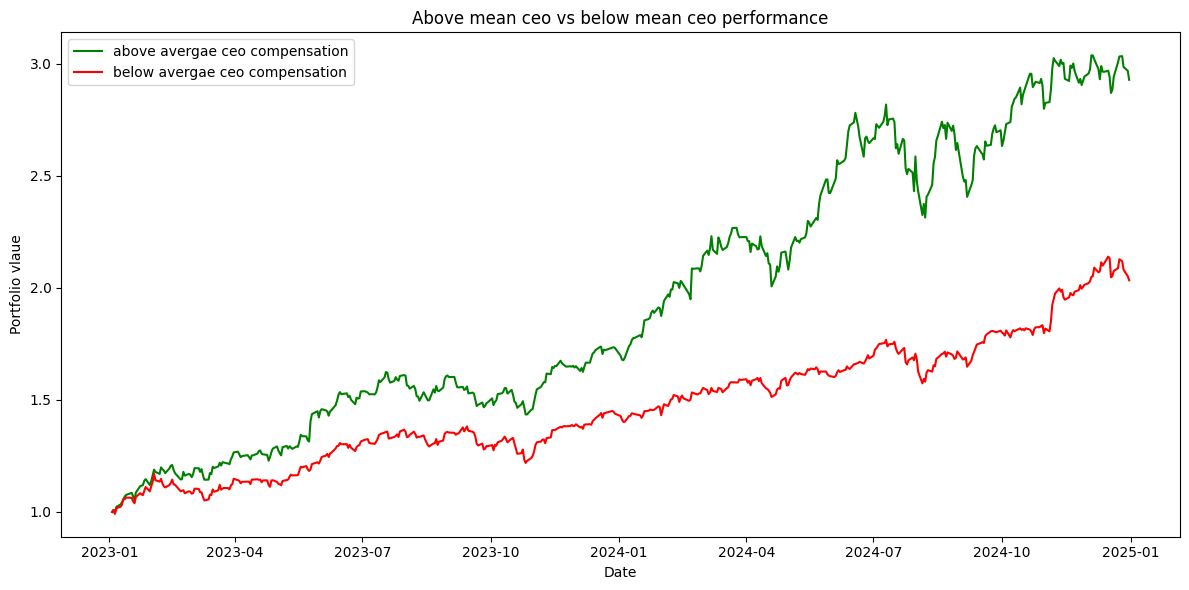

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(portfolios.index, portfolios['High_Port'], label='above avergae ceo compensation',color='green')
plt.plot(portfolios.index, portfolios['Low_Port'], label='below avergae ceo compensation',color='red')
plt.xlabel('Date')
plt.ylabel('Portfolio vlaue')
plt.title('Above mean ceo vs below mean ceo performance')
plt.legend()  
plt.tight_layout()       
plt.grid(False)
plt.savefig(fname='port value',dpi=1200)
plt.show()

In [30]:
pay_ratio = pd.read_csv('pay_ratio.csv')

In [31]:
high = pd.merge(high,pay_ratio)
mid = pd.merge(mid,pay_ratio)
low = pd.merge(low,pay_ratio)

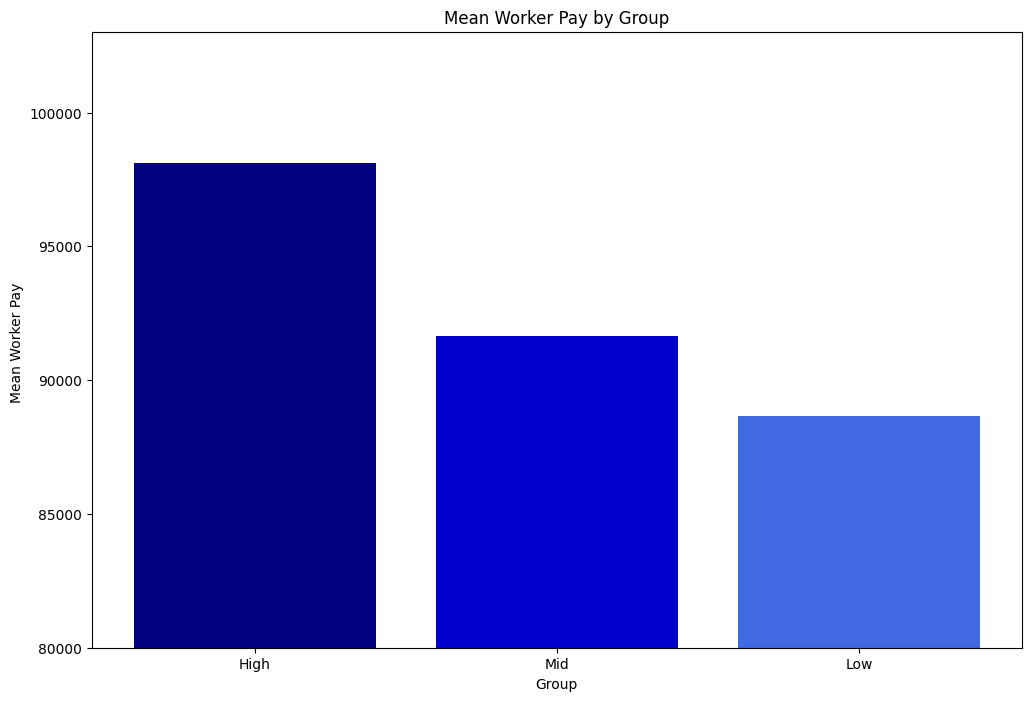

In [32]:
high_mean = high['Median Worker Pay'].mean()
mid_mean = mid['Median Worker Pay'].mean()
low_mean = low['Median Worker Pay'].mean()

groups = ['High', 'Mid', 'Low']
means = [high_mean, mid_mean, low_mean]
plt.figure(figsize=(12,8))
plt.bar(groups, means, color=['navy', 'mediumblue', 'royalblue'])
plt.xlabel('Group')
plt.ylabel('Mean Worker Pay ')
plt.title('Mean Worker Pay by Group')
plt.ylim(bottom=80000)
plt.savefig('mean_pay',dpi=1200)
plt.show()

In [33]:
high.drop(columns=['Unnamed: 0','weight'],inplace=True)
mid.drop(columns=['Unnamed: 0','weight'],inplace=True)
low.drop(columns=['Unnamed: 0','weight'],inplace=True)

In [34]:
high = high.rename(columns={
    "CEO PaySort ascending": "CEO Pay",
    "Pay RatioSort ascending": "Pay Ratio"
})
mid = mid.rename(columns={
    "CEO PaySort ascending": "CEO Pay",
    "Pay RatioSort ascending": "Pay Ratio"
})
low = low.rename(columns={
    "CEO PaySort ascending": "CEO Pay",
    "Pay RatioSort ascending": "Pay Ratio"
})

In [35]:
low

,Market Cap,Company,CEO,Year,CEO Pay,Rank,Ticker,Median Worker Pay,Pay Ratio
0,2.087789e+12,Alphabet Inc.,Sundar Pichai,2023,8802824,low,GOOG,304930,29:01:00
1,4.654769e+11,Costco Wholesale,Craig Jelinek,2023,16870623,low,COST,50202,336:01:00
2,4.644632e+11,Oracle Corp.,Safra Catz,2023,5250680,low,ORCL,85991,61:01:00
3,4.076287e+11,Procter & Gamble Co,Jon Moeller,2023,21715625,low,PG,64024,339:01:00
4,3.939678e+11,"Home Depot, Inc.",Edward Decker,2023,14419252,low,HD,35131,410:01:00
...,...,...,...,...,...,...,...,...,...
152,9.096586e+09,Federal Realty Investment Trust,Donald Wood,2023,8941820,low,FRT,135358,66:01:00
153,8.116446e+09,Generac Holdings Inc.,Aaron Jagdfeld,2023,7084966,low,GNRC,70609,101:01:00
154,7.359629e+09,Mohawk Industries Inc.,Jeffrey Lorberbaum,2023,4428417,low,MHK,42888,103:01:00
155,7.266872e+09,Marketaxess Holdings Inc.,Christopher Concannon,2023,8293086,low,MKTX,167000,50:01:00


In [36]:
ordered_columns = [
    "Ticker",           
    "Company",          
    "CEO",              
    "Year",             
    "Market Cap",       
    "CEO Pay",          
    "Median Worker Pay",
    "Pay Ratio",        
    "Rank"              
]

In [37]:
high = high[ordered_columns]
mid = mid[ordered_columns]
low = low[ordered_columns]

In [38]:
# high.to_csv('high.csv')
# mid.to_csv('mid.csv')
# low.to_csv('low.csv')

In [39]:
debate = pd.concat([high,mid,low])
debate

,Ticker,Company,CEO,Year,Market Cap,CEO Pay,Median Worker Pay,Pay Ratio,Rank
0,AAPL,Apple Inc.,Tim Cook,2023,3.632945e+12,63209845,94118,672:01:00,high
1,NVDA,Nvidia Corp.,Jen-Hsun Huang,2024,3.048048e+12,34167902,266939,128:01:00,high
2,MSFT,Microsoft Corp.,Satya Nadella,2023,2.951216e+12,48512537,193770,250:01:00,high
3,MSFT,Microsoft Corp.,Satya Nadella,2023,2.951216e+12,48512537,193770,250:01:00,high
4,AVGO,Broadcom Inc.,Hock Tan,2023,9.348002e+11,161826161,317199,510:01:00,high
...,...,...,...,...,...,...,...,...,...
152,FRT,Federal Realty Investment Trust,Donald Wood,2023,9.096586e+09,8941820,135358,66:01:00,low
153,GNRC,Generac Holdings Inc.,Aaron Jagdfeld,2023,8.116446e+09,7084966,70609,101:01:00,low
154,MHK,Mohawk Industries Inc.,Jeffrey Lorberbaum,2023,7.359629e+09,4428417,42888,103:01:00,low
155,MKTX,Marketaxess Holdings Inc.,Christopher Concannon,2023,7.266872e+09,8293086,167000,50:01:00,low


In [40]:
industry = pd.read_csv('Industry.csv',index_col=0)
industry

,Ticker,Industry
0,ROST,Consumer Cyclical
1,KO,Consumer Defensive
2,CHTR,Communication Services
3,APTV,Consumer Cyclical
4,ACN,Technology
...,...,...
478,EXPE,Consumer Cyclical
479,EXPE,Consumer Cyclical
480,BRK.B,Financial Services
481,TTWO,Communication Services


In [41]:
debate = pd.merge(debate,industry)
# debate.to_csv('final.csv')

In [42]:
debate.set_index('Ticker',inplace=True)
debate

,Company,CEO,Year,Market Cap,CEO Pay,Median Worker Pay,Pay Ratio,Rank,Industry
Ticker,,,,,,,,,
AAPL,Apple Inc.,Tim Cook,2023,3.632945e+12,63209845,94118,672:01:00,high,Technology
NVDA,Nvidia Corp.,Jen-Hsun Huang,2024,3.048048e+12,34167902,266939,128:01:00,high,Technology
MSFT,Microsoft Corp.,Satya Nadella,2023,2.951216e+12,48512537,193770,250:01:00,high,Technology
MSFT,Microsoft Corp.,Satya Nadella,2023,2.951216e+12,48512537,193770,250:01:00,high,Technology
MSFT,Microsoft Corp.,Satya Nadella,2023,2.951216e+12,48512537,193770,250:01:00,high,Technology
...,...,...,...,...,...,...,...,...,...
FRT,Federal Realty Investment Trust,Donald Wood,2023,9.096586e+09,8941820,135358,66:01:00,low,Real Estate
GNRC,Generac Holdings Inc.,Aaron Jagdfeld,2023,8.116446e+09,7084966,70609,101:01:00,low,Industrials
MHK,Mohawk Industries Inc.,Jeffrey Lorberbaum,2023,7.359629e+09,4428417,42888,103:01:00,low,Consumer Cyclical


In [43]:
debate.drop_duplicates(inplace=True)

In [44]:
industries = debate['Industry'].unique().tolist()
industries

['Technology',
 'Financial Services',
 'Energy',
 'Communication Services',
 'Consumer Defensive',
 'Consumer Cyclical',
 'Industrials',
 'Real Estate',
 'Healthcare',
 'Basic Materials',
 'Utilities']

In [45]:
for i in industries:
    valid_name = i.replace(" ", "_")  # Replace spaces with underscores
    exec(f"{valid_name}_df = debate[debate['Industry'] == i]")



In [46]:
# Technology_df.to_csv('tech.csv')
# Financial_Services_df.to_csv('fnce.csv')
# Energy_df.to_csv('energy.csv')
# Communication_Services_df.to_csv('cs.csv')
# Consumer_Defensive_df.to_csv('cd.csv')
# Consumer_Cyclical_df.to_csv('cc.csv')
# Industrials_df.to_csv('industrial.csv')
# Real_Estate_df.to_csv('REAL.csv')
# Healthcare_df.to_csv('heal.csv')
# Basic_Materials_df.to_csv('BasicMa.csv')
# Utilities_df.to_csv('utils.csv')

[*********************100%***********************]  2 of 2 completed


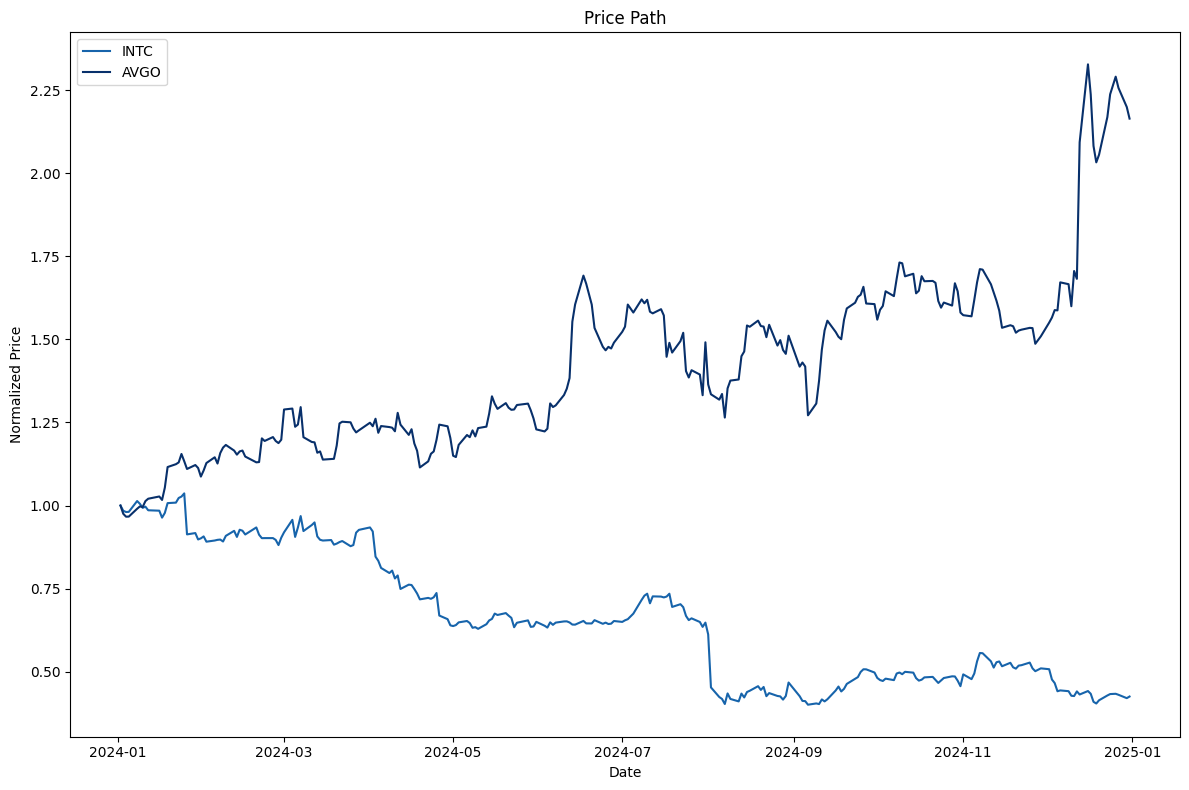

In [73]:
comparison_tickers = ['INTC','AVGO']
start_comaprison = "2024-01-01"
end_comparison = "2025-01-01"
comparison_prices = yf.download(comparison_tickers,start=start_comaprison,end=end_comparison)["Close"]
comparison_prices = comparison_prices/comparison_prices.iloc[0]
num_tickers = len(comparison_tickers)
blue_shades = cm.Blues(np.linspace(0.8, 1, num_tickers))
plt.figure(figsize=(12,8))
for i, ticker in enumerate(comparison_tickers):
    plt.plot(comparison_prices.index, comparison_prices[ticker], label=ticker, color=blue_shades[i])
plt.title('Price Path')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.savefig(f'{comparison_tickers[0]}_{comparison_tickers[1]}',dpi=1600)
plt.show()
